# Tutorial 1: Data Preprocessing

---

### Introduction

Welcome! This tutorial will show you how to visualise and preprocess astronomical data using python. From this tutorial, you will learn the following:

1. How to download astronomical data
2. How to read and visualise data
3. How to preprocess imagery data

This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels),

Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

---

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

### Downloading data

First, let us call the python script that will let us download the data.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()




4422102/4422102 [==============================] - 0s 0us/step


In [ ]:


class_names = ['T-shirt/top', 'Trouser', 'Pullover']
print("Label 0 corresponds to", class_names[0])
print("Label 1 corresponds to", class_names[1])
print("Label 2 corresponds to", class_names[2])


Label 0 corresponds to T-shirt/top
Label 1 corresponds to Trouser
Label 2 corresponds to Pullover


---

### Reading data

First, let's read the inputs `images` and the outputs `labels` into two seperate variables.

In [ ]:
#images_train after reduction of the training sets so that only the labels 0,1,2 are included
images_train = train_images[np.where(train_labels<=2)]
labels_train = train_labels[train_labels<=2]

Now check the shapes and data types to see they are consistent.

In [ ]:
print("Shape of the input (training): "+str(images_train.shape)+ ", type: "+ str(images_train.dtype))
print("Shape of the output (training): "+str(labels_train.shape)+ ", type: "+ str(labels_train.dtype))



Shape of the input (training): (18000, 28, 28), type: uint8
Shape of the output (training): (18000,), type: uint8


We notice the following:
 1. The input data has 18000 samples with 3 channels,  where each sample has a size of 28 x 28.
 2. The output is a one-dimensional array which contains the labels of the samples. Each label is 0,1,2 according to the categories listed in the first cell above.

**Exercise 1:**
Store the testing set inputs and outputs into two different variables, and display their shapes and data types.

In [ ]:
### -- Code here --

#images_test after reduction of the testing sets so that only the labels 0,1,2 are included
images_test = test_images[np.where(test_labels<=2)]
labels_test = test_labels[test_labels<=2]


In [ ]:
print("Shape of the input (testing): "+str(images_test.shape)+ ", type: "+ str(images_test.dtype))
print("Shape of the output (testing): "+str(labels_test.shape)+ ", type: "+ str(labels_test.dtype))


Shape of the input (testing): (3000, 28, 28), type: uint8
Shape of the output (testing): (3000,), type: uint8


Now, let's check the frequencies of the labels/output. First we display the output.

In [ ]:
class_names

['T-shirt/top', 'Trouser', 'Pullover']

   Where (as indicated in a one of first cell above):
   - 0: `T-shirt/top`,
   - 1: `Trouser`,
   - 2: `Pullover`,


Next use numpy functions to summarize the number in each class

In [ ]:
import numpy as np # For handling N-DIMENSIONAL ARRAYS

In [ ]:
print(labels_train)
labels_trainNP = np.array(labels_train)
unique_labels, count_labels = np.unique(labels_trainNP, return_counts=True)
print("Label, count:", unique_labels, count_labels )

[0 0 0 ... 2 1 0]
Label, count: [0 1 2] [6000 6000 6000]


### Data visualisation

We can also try to visualise label frequencies in a bar graph. To do this, we need the `pyplot' graphics package.

In [ ]:
import matplotlib.pyplot as plt #This displays graphs once they have been created

The code for plotting is below. To make a clear display, we replace class labels with the actual class names.

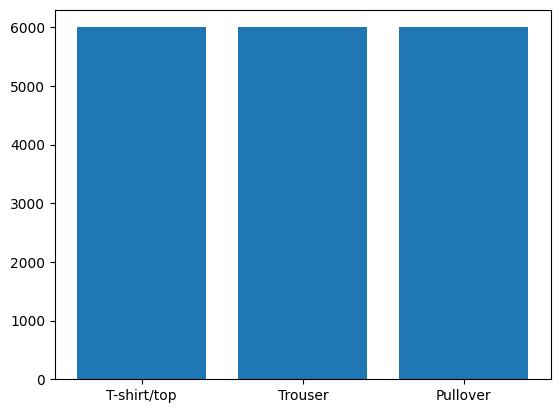

In [ ]:
plt.bar(range(len(unique_labels)), count_labels, align='center')
plt.xticks(range(len(unique_labels)), class_names)
plt.show()

**Exercise 2:**
Count the class frequencies for the testing data, and visualise using a histogram.

In [ ]:
### -- Code here --
print(labels_test)
labels_testNP = np.array(labels_test)
unique_labels_test, count_labels_test = np.unique(labels_testNP, return_counts=True)
print("Label, count:", unique_labels_test, count_labels_test )
np.sum(count_labels_test)

[2 1 1 ... 1 1 1]
Label, count: [0 1 2] [1000 1000 1000]


3000

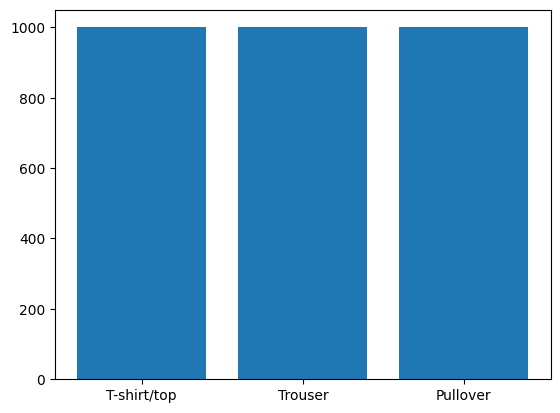

In [ ]:
plt.bar(range(len(unique_labels_test)), count_labels_test, align='center')
plt.xticks(range(len(unique_labels_test)), class_names)
plt.show()

Now let us take a look at the images of the different galaxy shapes.

In [ ]:
from PIL import Image #  PIL is the Python Imaging Library

label: T-shirt/top


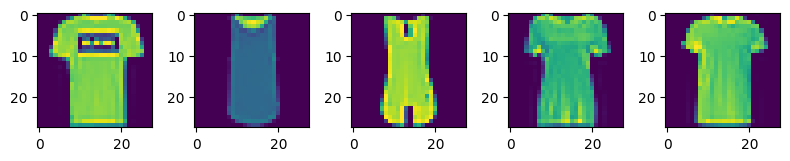

label: Trouser


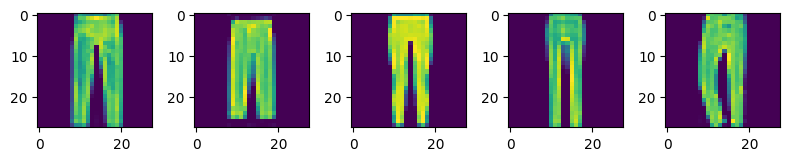

label: Pullover


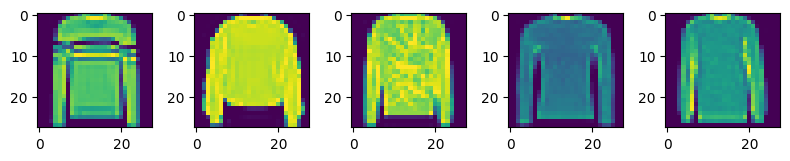

In [ ]:
# Display nImage images for each class
nImage = 5
# Loop through classes
for j in range(len(class_names)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (nImage):    # Create images in each column
        train_image = images_train[(labels_train == j)][i]
        fig.add_subplot(1, nImage, i+1)
        plt.imshow(np.array(train_image).transpose(0, 1))
    print("label: "+str(class_names[j]))
    plt.tight_layout()
    plt.show()

---

### Data preprocessing

Classical machine learning often subjects the data to extensive preprocessing before classification, especially when the datasets involved are relatively small. Preprocessing functions include feature extraction, optimization, normalization, augmentation, cropping, resizing, denoising, and so on. For each of these functions, there are many alternative algorithms.

On the other hand, deep learning models with lots of data are often referred to as End-to-End learning models ([E2E](https://towardsdatascience.com/e2e-the-every-purpose-ml-method-5d4f20dafee4)), since they can extract information from raw data.

In the following tutorial, we will use an [_autoencoder_](https://en.wikipedia.org/wiki/Autoencoder), which uses deep learning to extract features. In theory, we can feed the raw data into the autoencoder without any preprocessing. However, in practice this greatly increases the computation time required. In this tutorial series we need to train the models in a reasonable time so that we can bring the idea across. The issue is especially important because optimal use of raw data requires hyperparameter tuning, which is even more time consuming.

However, preprocessing has a caveat. We need to make sure that the preprocessing does not lose any useful information. How can we verify this? In our case, since the data is imagery data we can examine the preprocessed images visually. If we can still easily classify them, then we can conclude that the preprocessing is effective.

Using an autoencoder is just one possibility. Participants are encouraged to explore alternatives.

In this tutorial, we will try to reduce the complexity of the data by doing the following:
   - Convert images to grayscale (reduces data size by a factor  of 3)
   - Reduce the size of the image by a factor of 4.

#### A. Grayscaling
We begin with conversion to grayscale, following this [tutorial](https://www.tutorialspoint.com/pytorch-how-to-convert-an-image-to-grayscale) from [tutorialspoint.com](https://www.tutorialspoint.com).

In [ ]:
import torchvision.transforms as transforms #Transforms are for common image transformations
import torch

In [ ]:
# Display the shape of image data
images_train.shape

(18000, 28, 28)

##**We can see that the original image size has one channel. And then we don't need to perfom the grayscalling**.


In [ ]:
#transformGrey = transforms.Grayscale()
#images_trainGrey = transformGrey(images_train)

#### B. Image resizing  
(see  [this reference](https://www.tutorialspoint.com/pytorch-how-to-resize-an-image-to-a-given-size))

Reducing the size of the image can further reduce the complexity of the image data. However, we must be careful not to reduce so much as to removed distinctions between classes.

In [ ]:
# Define the transform. The number in parenthesis gives number of pixels per side.
transf = transforms.ToTensor()
transformResize = transforms.Resize(56)


Now let's reduce the images:

In [ ]:
transform = transforms.ToTensor()
liste = []
resize = np.array([images_train.shape[0]])
for i in range(images_train.shape[0]):
  it = transf(images_train[i])
  liste.append(it)
images = torch.stack(liste)

images_trainResized = transformResize(images)


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Check the size again:

In [ ]:
images_trainResized.shape

torch.Size([18000, 1, 56, 56])

**Exercise 4:**
Visualise the resized images for all classes

label: T-shirt/top


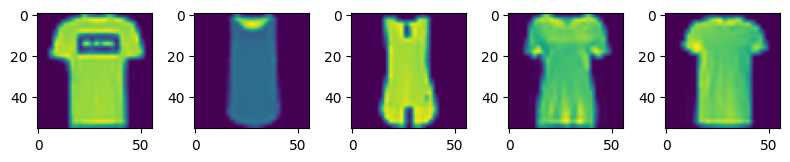

label: Trouser


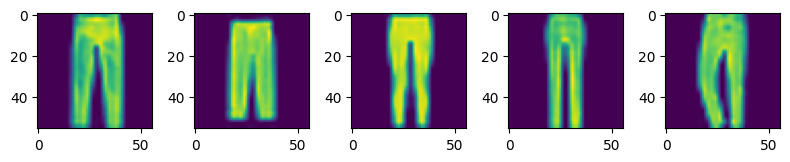

label: Pullover


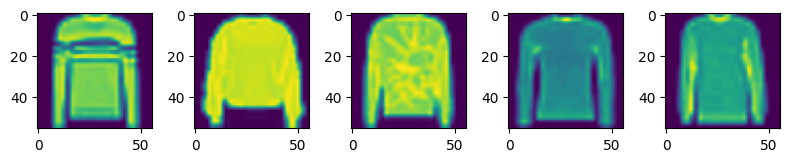

In [ ]:
#___ Code here___
nImage = 5
# Loop through classes
for j in range(len(class_names)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (nImage):    # Create images in each column
        train_image = images_trainResized[(labels_train == j)][i]
        fig.add_subplot(1, nImage, i+1)
        plt.imshow(np.array(train_image).transpose(1, 2, 0))
    print("label: "+str(class_names[j]))
    plt.tight_layout()
    plt.show()




##### **_End of the pre-processing pipeline_**

Now the above pre-processing is not the only way where we can reduce the features, the following can also be done:
1. Cropping images away from the centre
2. Image segmentation, maybe to remove background noise (Deep learning can be used for this)
3. Explore ...

### Normalization

The pixel levels run from 0 to 255. If we divide by 255, we will put the levels within a standard scale of 0 to 1. Then they are suitable to use with other features that are similarly normalised. ([source](https://developers.google.com/machine-learning/data-prep/transform/normalization)).

###**We don't need to have our dataset normalized because it's already normalized.**

In [ ]:
images_trainPre = images_trainResized

Now let us check the values for one image before and after the nomalisation.

In [ ]:
print("Pixel levels before normalization:")
print(images_trainResized[0][0][0])
print("Pixel levels after  normalization:")
print(images_trainPre[0][0][0])

Pixel levels before normalization:
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0010, 0.0029, 0.0029, 0.0010, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0402, 0.1206, 0.3049, 0.5931, 0.6539, 0.4873, 0.3559, 0.2598,
        0.2059, 0.1941, 0.1833, 0.1735, 0.2118, 0.2980, 0.4206, 0.5794, 0.6245,
        0.5559, 0.4069, 0.1775, 0.0471, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])
Pixel levels after  normalization:
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0010, 0.0029, 0.0029, 0.0010, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0402, 0.1206, 0.3049, 0.5931, 0.6539, 0.4873, 0.3559, 0.2598,
        0.2059, 0.1941, 0.1833, 0.1735, 0.2118, 0.2980, 0.4206, 0.5794, 0.6245,
        0.5559, 0.4069, 0.1775, 0.0471, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0

**Exercise 5**: Perform the preprocessing pipeline but on the testing set

label: T-shirt/top


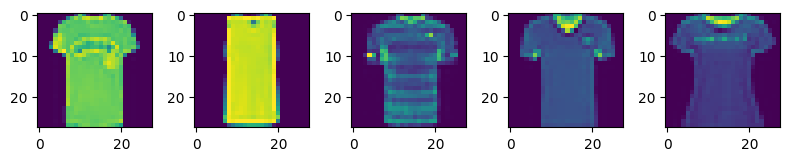

label: Trouser


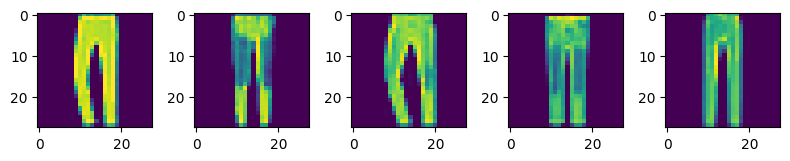

label: Pullover


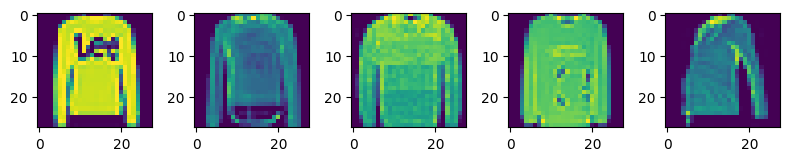

In [ ]:
#___ Code here___
# Display nImage images for each class
nImage = 5
# Loop through classes
for j in range(len(class_names)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (nImage):    # Create images in each column
        test_image = images_test[(labels_test == j)][i]
        fig.add_subplot(1, nImage, i+1)
        plt.imshow(np.array(test_image).transpose(0,1))
    print("label: "+str(class_names[j]))
    plt.tight_layout()
    plt.show()

In [ ]:
# Display the shape of image data
images_test.shape

(3000, 28, 28)

##**We can see that the original image size has one channel. And then we don't need to perfom the grayscalling**.


#### B. Image resizing  
(see  [this reference](https://www.tutorialspoint.com/pytorch-how-to-resize-an-image-to-a-given-size))

Reducing the size of the image can further reduce the complexity of the image data. However, we must be careful not to reduce so much as to removed distinctions between classes.

In [ ]:
# Define the transform. The number in parenthesis gives number of pixels per side.
transf = transforms.ToTensor()
transformResize = transforms.Resize(56)


Now let's reduce the images:

In [ ]:
transform = transforms.ToTensor()
liste1 = []
resize = np.array([images_test.shape[0]])
for i in range(images_test.shape[0]):
  it = transf(images_test[i])
  liste1.append(it)
images1 = torch.stack(liste1)

images_testResized = transformResize(images1)


Check the size again:

In [ ]:
images_testResized.shape

torch.Size([3000, 1, 56, 56])

**Exercise 4:**
Visualise the resized images for all classes

label: T-shirt/top


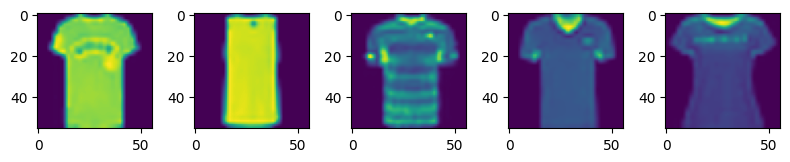

label: Trouser


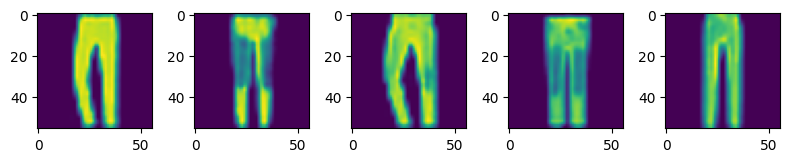

label: Pullover


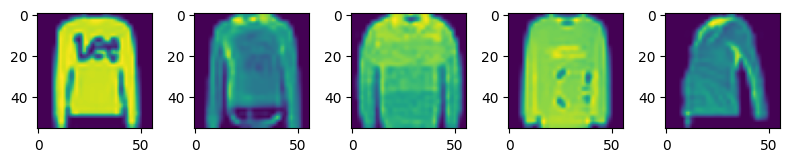

In [ ]:
#___ Code here___
nImage = 5
# Loop through classes
for j in range(len(class_names)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (nImage):    # Create images in each column
        test_image = images_testResized[(labels_test == j)][i]
        fig.add_subplot(1, nImage, i+1)
        plt.imshow(np.array(test_image).transpose(1, 2, 0))
    print("label: "+str(class_names[j]))
    plt.tight_layout()
    plt.show()




##### **_End of the pre-processing pipeline_**

Now the above pre-processing is not the only way where we can reduce the features, the following can also be done:
1. Cropping images away from the centre
2. Image segmentation, maybe to remove background noise (Deep learning can be used for this)
3. Explore ...

### Normalization

The pixel levels run from 0 to 255. If we divide by 255, we will put the levels within a standard scale of 0 to 1. Then they are suitable to use with other features that are similarly normalised. ([source](https://developers.google.com/machine-learning/data-prep/transform/normalization)).

###**We don't need to have our dataset normalized because it's already normalized.**

In [ ]:
images_testPre = images_testResized

Now let us check the values for one image before and after the nomalisation.

In [ ]:
print("Pixel levels before normalization:")
print(images_testResized[0][0][0])
print("Pixel levels after  normalization:")
print(images_testPre[0][0][0])

Pixel levels before normalization:
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0127, 0.0382, 0.1039, 0.2098, 0.1971, 0.0657, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0490, 0.1471, 0.1843, 0.1608, 0.1118,
        0.0373, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])
Pixel levels after  normalization:
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0127, 0.0382, 0.1039, 0.2098, 0.1971, 0.0657, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0490, 0.1471, 0.1843, 0.1608, 0.1118,
        0.0373, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0

---

### **_End of Tutorial 1_**